# 1. Подготовка данных

In [1]:
import pandas as pd

data = pd.read_csv("./datasets/insurance.csv")

In [2]:
display(data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [4]:
display(data.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
num_columns = ["age", "bmi", "children", "charges"]
cat_columns = ["sex", "smoker", "region"]

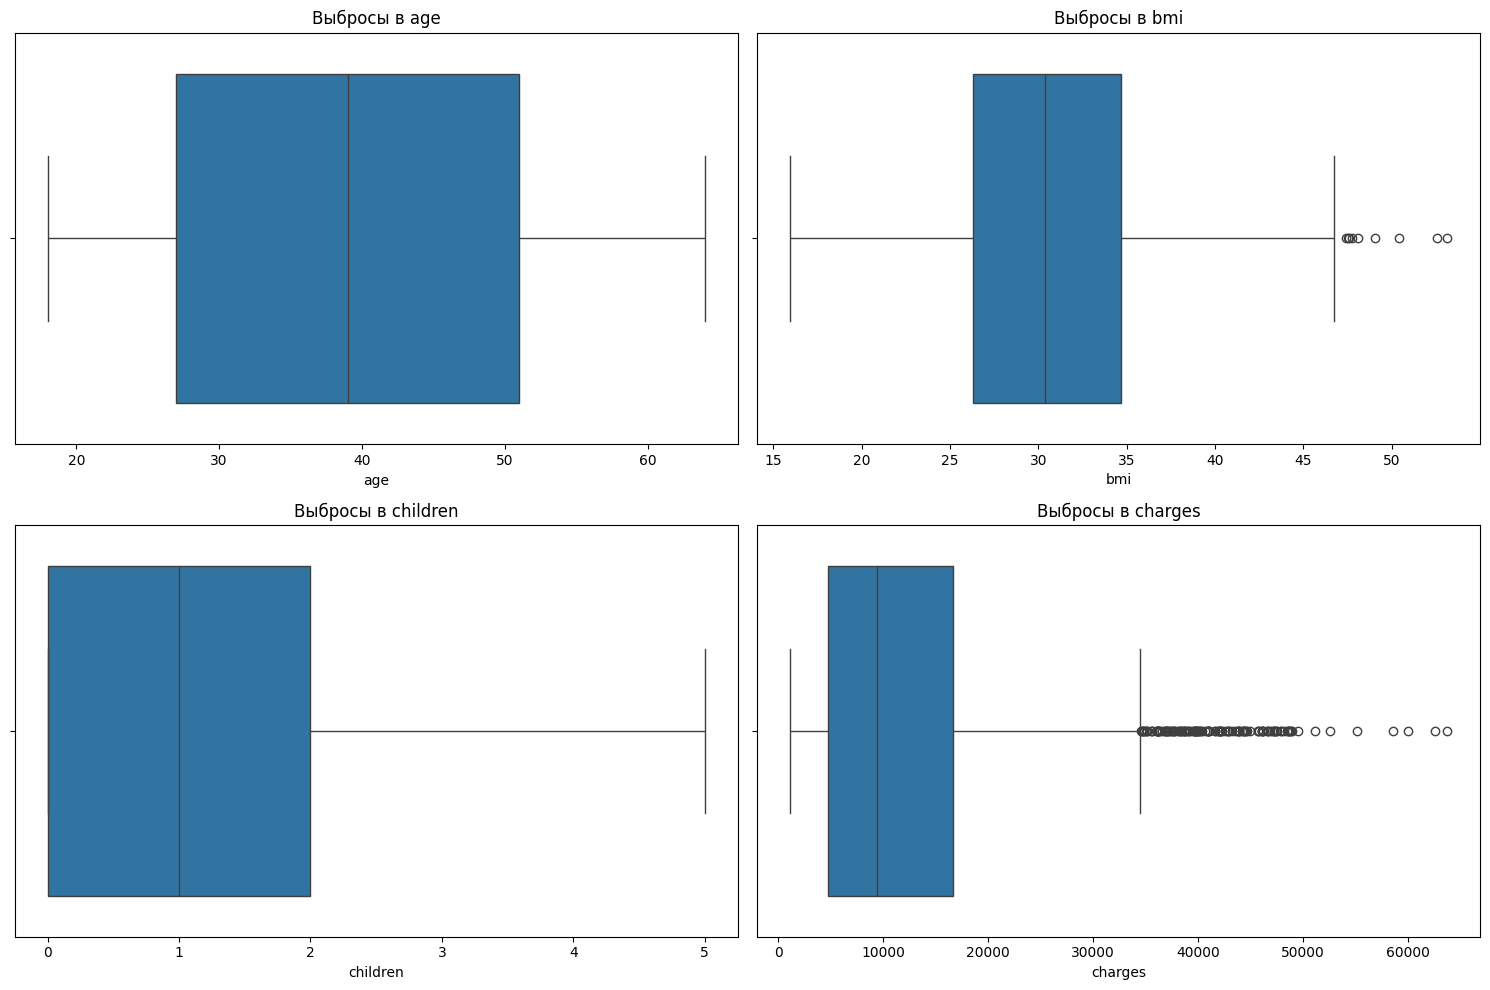

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(num_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Выбросы в {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [8]:
Q1_bmi = data['bmi'].quantile(0.25)
Q3_bmi = data['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

outliers_bmi = data[(data['bmi'] < lower_bound_bmi) | (data['bmi'] > upper_bound_bmi)]
print(f"Количество выбросов в BMI: {len(outliers_bmi)}")
print(f"Выбросы BMI:\n{outliers_bmi[['bmi']].head()}")

Количество выбросов в BMI: 9
Выбросы BMI:
       bmi
116  49.06
286  48.07
401  47.52
543  47.41
847  50.38


In [9]:
Q1_charges = data['charges'].quantile(0.25)
Q3_charges = data['charges'].quantile(0.75)
IQR_charges = Q3_charges - Q1_charges
lower_bound_charges = Q1_charges - 1.5 * IQR_charges
upper_bound_charges = Q3_charges + 1.5 * IQR_charges

outliers_charges = data[(data['charges'] < lower_bound_charges) | (data['charges'] > upper_bound_charges)]
print(f"\nКоличество выбросов в Charges: {len(outliers_charges)}")
print(f"Выбросы Charges:\n{outliers_charges[['charges']].head()}")


Количество выбросов в Charges: 139
Выбросы Charges:
       charges
14  39611.7577
19  36837.4670
23  37701.8768
29  38711.0000
30  35585.5760


In [10]:
data_clean = data[
    (data['bmi'] >= lower_bound_bmi) & (data['bmi'] <= upper_bound_bmi) 
    & (data['charges'] >= lower_bound_charges) & (data['charges'] <= upper_bound_charges)
]

print(f"Исходный размер данных: {data.shape}")
print(f"Размер после удаления выбросов: {data_clean.shape}")
print(f"Удалено строк: {len(data) - len(data_clean)}")

Исходный размер данных: (1338, 7)
Размер после удаления выбросов: (1193, 7)
Удалено строк: 145


In [11]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [12]:
data = pd.get_dummies(data, columns=cat_columns, drop_first=True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [13]:
data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

X = data.drop(columns=['charges'])
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_w = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_w = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

print(f"Обучающая выборка: {X_train_w.shape}")
print(f"Тестовая выборка: {X_test_w.shape}")

Обучающая выборка: (1070, 9)
Тестовая выборка: (268, 9)


# 2. Многомерная линейная регрессия

**Аналитическое решение**
Для поиска точки минимума, приравниваем градиент к нулю.
$$
2X^T(Xw-y) = 0
$$

$$
X^TXw = X^Ty
$$

$$
w^* = (X^TX)^{-1}X^Ty
$$

In [15]:
X = X_train_w  
y = y_train.values  

w_a = np.linalg.inv(X.T @ X) @ X.T @ y
display(w_a)

y_train_pred = X @ w_a

# display(y_train_pred)

array([ 1.33460897e+04,  3.61497541e+03,  2.03622812e+03,  5.16890247e+02,
       -9.29310107e+00,  9.55848141e+03, -1.58140981e+02, -2.90157047e+02,
       -3.49110678e+02])

In [21]:
learning_rate = 0.001
n_iter = 20000
tolerance = 1e-6

w_gd = np.zeros(X.shape[1])

for i in range(n_iter):
    gradient = (2/len(y)) * X.T @ (X @ w_gd - y)
    w_gd = w_gd - learning_rate * gradient
    
    if np.linalg.norm(gradient) < tolerance:
        print(f"Сходимость достигнута на итерации {i}")
        break

print("Параметры модели:")
print(w_gd)

Параметры модели:
[ 1.33460897e+04  3.61497543e+03  2.03622788e+03  5.16890239e+02
 -9.29308702e+00  9.55848142e+03 -1.58140032e+02 -2.90155990e+02
 -3.49109691e+02]


# 3. Добавление регуляризации

In [17]:
X = X_train_w 
y = y_train.values

alpha = 1.0


I = np.eye(X.shape[1])  
w_ridge_a = np.linalg.inv(X.T @ X + alpha * I) @ X.T @ y

print("Аналитическое решение (гребневая регрессия):")
print(w_ridge_a)


Аналитическое решение (гребневая регрессия):
[ 1.33336284e+04  3.61135452e+03  2.03436235e+03  5.16761658e+02
 -8.61597468e+00  9.54927668e+03 -1.57633519e+02 -2.88545534e+02
 -3.48270354e+02]


In [18]:
learning_rate = 0.0001
n_iter = 20000
tolerance = 1e-6
beta = 1 

w_lasso_gd = np.zeros(X.shape[1])

for i in range(n_iter):
    gradient = 2 * X.T @ (X @ w_lasso_gd - y) + beta * np.sign(w_lasso_gd)
    
    w_new = w_lasso_gd - learning_rate * gradient
    
    if np.linalg.norm(gradient) < tolerance or np.linalg.norm(w_new - w_lasso_gd) < tolerance:
        print(f"Сходимость достигнута на итерации {i}")
        break
    
    w_lasso_gd = w_new

print("\nГрадиентный спуск (LASSO регрессия):")
print(w_lasso_gd)

Сходимость достигнута на итерации 248

Градиентный спуск (LASSO регрессия):
[ 1.33460893e+04  3.61497501e+03  2.03622743e+03  5.16889797e+02
 -9.29257240e+00  9.55848090e+03 -1.58139560e+02 -2.90155401e+02
 -3.49109182e+02]


# 4. Оценка обобщающей способности

In [20]:
from sklearn.metrics import mean_squared_error

# 1. Константная модель
y_pred_constant = np.full(len(y), np.mean(y))
mse_constant = mean_squared_error(y, y_pred_constant)

# 2. Линейная регрессия (аналитическая)
y_pred_analytical = X_test_w @ w_a
mse_analytical = mean_squared_error(y_test, y_pred_analytical)

# 3. Линейная регрессия (градиентный спуск)
y_pred_gradient = X_test_w @ w_gd
mse_gradient = mean_squared_error(y_test, y_pred_gradient)

# 4. Гребневая регрессия (аналитическая)
y_pred_ridge_analytical = X_test_w @ w_ridge_a
mse_ridge_analytical = mean_squared_error(y_test, y_pred_ridge_analytical)

# 5. Лассо регрессия (градиентный спуск)
y_pred_ridge_gd = X_test_w @ w_lasso_gd
mse_ridge_gd = mean_squared_error(y_test, y_pred_ridge_gd)

# Сравнение
print("СРАВНЕНИЕ МОДЕЛЕЙ:")
models = {
    "Константная": mse_constant,
    "LinReg (аналит.)": mse_analytical,
    "LinReg (град.)": mse_gradient,
    "Ridge (аналит.)": mse_ridge_analytical,
    "Ridge (град.)": mse_ridge_gd
}

for model, mse in models.items():
    print(f"{model}: {mse:.6f}")

СРАВНЕНИЕ МОДЕЛЕЙ:
Константная: 144333621.933148
LinReg (аналит.): 33596915.851361
LinReg (град.): 33596916.585526
Ridge (аналит.): 33599659.532941
Ridge (град.): 33596917.618012
